### **1. Exploratory Data Analysis (EDA):**

In [1]:
import pandas as pd
df = pd.read_csv("/content/glass.csv")

In [10]:
df.head(10)

,plas,pres,test,mass,pedi,class
0,148,72,0,33.6,0.627,1
1,85,66,0,26.6,0.351,0
2,183,64,0,23.3,0.672,1
3,89,66,94,28.1,0.167,0
4,137,40,168,43.1,2.288,1
5,116,74,0,25.6,0.201,0
6,78,50,88,31.0,0.248,1
7,115,0,0,35.3,0.134,0
8,197,70,543,30.5,0.158,1
9,125,96,0,0.0,0.232,1


In [11]:
df.describe()

,plas,pres,test,mass,pedi,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,0.471876,0.348958
std,31.972618,19.355807,115.244002,7.884160,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,0.000000
50%,117.000000,72.000000,30.500000,32.000000,0.372500,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,1.000000


In [12]:
#data types
df.dtypes

,0
plas,int64
pres,int64
test,int64
mass,float64
pedi,float64
class,int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plas    768 non-null    int64  
 1   pres    768 non-null    int64  
 2   test    768 non-null    int64  
 3   mass    768 non-null    float64
 4   pedi    768 non-null    float64
 5   class   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [14]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [15]:
df.duplicated().sum()

0

In [16]:
df.isna()

,plas,pres,test,mass,pedi,class
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
763,False,False,False,False,False,False
764,False,False,False,False,False,False
765,False,False,False,False,False,False
766,False,False,False,False,False,False


In [17]:
df.isna().sum()

,0
plas,0
pres,0
test,0
mass,0
pedi,0
class,0



### **2: Data Visualization:**

<Axes: >

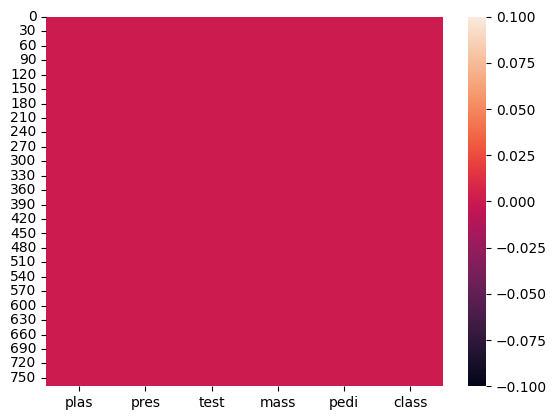

In [18]:
import seaborn as sns
sns.heatmap(df.isna())

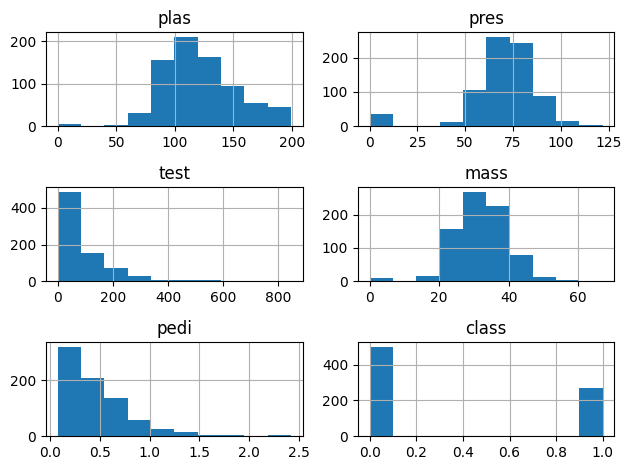

In [19]:
import matplotlib.pyplot as plt
df.hist()
plt.tight_layout()

<Axes: >

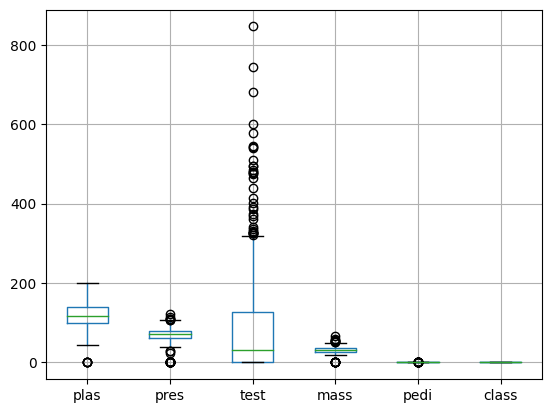

In [20]:
df.boxplot()

### **4: Random Forest Model Implementation**

In [21]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [23]:
array = df.values

In [25]:
X = array[:,0:5]
Y = array[:,5]

In [26]:
num_trees = 100
max_features = 3 #Total features m=8, K=3 i.e. randomly select 3 features
kfold = KFold(n_splits=10)

In [27]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) # try random_state=2, n_estimators=10 by default, default=gini
results = cross_val_score(model, X, Y, cv=kfold)

In [28]:
results

array([0.66233766, 0.77922078, 0.67532468, 0.71428571, 0.77922078,
       0.75324675, 0.81818182, 0.7012987 , 0.71052632, 0.71052632])

In [29]:
print(results.mean())

0.7304169514695831


### **5: Bagging and Boosting Methods**

In [32]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


array = df.values
X = array[:,0:5]
Y = array[:,5]


kfold = KFold(n_splits=10)
num_trees = 100

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=num_trees, random_state=7) #Classifier, n_estimators: default=10
results = cross_val_score(model, X, Y, cv=kfold)

In [33]:
results

array([0.67532468, 0.77922078, 0.75324675, 0.71428571, 0.76623377,
       0.71428571, 0.77922078, 0.74025974, 0.72368421, 0.69736842])

In [34]:
print(results.mean())

0.734313055365687


In [35]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array = df.values
X = array[:,0:5]
Y = array[:,5]
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed) #n_estimators=50 by default
results = cross_val_score(model, X, Y, cv=kfold)

In [36]:
results

array([0.76623377, 0.7012987 , 0.71428571, 0.79220779, 0.77922078,
       0.72727273, 0.61038961, 0.74025974, 0.72368421, 0.71052632])

In [37]:
print(results.mean())

0.726537935748462


### **Additional Notes:**

### **1. Explain Bagging and Boosting methods. How is it different from each other**

Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning techniques that aim to improve the performance of machine learning models by combining multiple models (or "weak learners"). However, they do so in fundamentally different ways.

1. Bagging (Bootstrap Aggregating):
Purpose: The goal of bagging is to reduce variance and prevent overfitting.

How It Works:

It creates multiple subsets of the training data by randomly sampling with replacement (bootstrap sampling).
Each subset is used to train a separate model (usually the same type, like decision trees).
Once all the models are trained, their predictions are averaged (for regression) or voted on (for classification) to get the final prediction.
Since models are trained on different data, they are less likely to overfit, leading to a more robust final model.
Popular Algorithm: Random Forest is a popular example of a bagging method.

Key Points:

The models are trained independently.
Reduces variance (helps to stabilize models that are prone to overfitting).
Suitable for high-variance models (like decision trees).
2. Boosting:
Purpose: Boosting is used to reduce both bias and variance by sequentially building models, focusing on correcting the errors of previous models.

How It Works:

Models are built sequentially, with each new model correcting the errors made by the previous one.
The training data is weighted, with more emphasis placed on instances that were misclassified by earlier models.
In each iteration, a new weak learner is added, and the process continues until a stopping criterion is met (like a fixed number of models or low error).
Final predictions are made by combining the weak learners' predictions, typically through weighted voting or averaging.
Popular Algorithms: AdaBoost, Gradient Boosting, and XGBoost are common boosting techniques.

Key Points:

Models are built sequentially, where each model corrects the mistakes of the previous one.
Reduces both bias and variance.
Focuses on improving accuracy by fixing errors in weak learners.
Suitable for models with high bias (underfitting).

### **2. Explain how to handle imbalance in the data**


Handling imbalanced data is a common challenge in machine learning, particularly in classification tasks where one class significantly outnumbers the other(s). This imbalance can lead to biased models that are heavily influenced by the majority class. Several techniques can be employed to address this issue, including both data-level and algorithm-level methods.

1. Resampling Techniques:
Resampling involves modifying the dataset to either increase the number of minority class instances or reduce the majority class instances.

a) Oversampling the Minority Class:
Description: This involves increasing the number of instances in the minority class by duplicating them or generating new synthetic examples.
Techniques:
Random Oversampling: Randomly duplicates instances of the minority class until there’s a balance with the majority class.
SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic examples of the minority class by interpolating between existing instances.
ADASYN (Adaptive Synthetic Sampling): A variant of SMOTE that focuses more on generating new samples in areas of the feature space that are harder to classify.
Pros: Helps improve the balance, reduces bias towards the majority class.
Cons: Random oversampling can lead to overfitting since it duplicates data without adding new information.
b) Undersampling the Majority Class:
Description: This method reduces the number of instances in the majority class by randomly removing them.

Techniques:

Random Undersampling: Randomly removes samples from the majority class to balance the dataset.
Cluster-Based Undersampling: Clusters the majority class and then selects representative samples from each cluster to reduce data loss.
Pros: Can help improve model performance by forcing the model to pay attention to the minority class.

Cons: May lead to loss of valuable data and potentially underfit the model.

2. Algorithmic Approaches:
Many machine learning algorithms have built-in mechanisms to handle imbalanced datasets.

a) Class Weighting:
Description: Algorithms like Support Vector Machines (SVM), Decision Trees, and Logistic Regression allow you to assign a higher weight to the minority class.

How It Works: During training, the algorithm penalizes the misclassification of the minority class more heavily than the majority class.

Pros: Reduces the need for resampling and doesn’t involve changing the original data distribution.

Cons: Choosing the right weights can be challenging, and it may not always improve performance in all cases.

b) Balanced Algorithms:
Some algorithms are designed specifically to handle class imbalance. Examples include:

Balanced Random Forest: A variation of the Random Forest algorithm that balances the data at each split.
XGBoost with scale_pos_weight: A popular boosting algorithm that allows adjusting for imbalance by setting a parameter that controls the balance of positive and negative classes.
3. Evaluation Metrics for Imbalanced Data:
Using accuracy as the sole evaluation metric on imbalanced data can be misleading, as a model can achieve high accuracy by simply predicting the majority class most of the time. Instead, consider using alternative metrics:

a) Precision, Recall, and F1-Score:
Precision: Measures the proportion of positive predictions that are actually correct.
Recall (Sensitivity): Measures the proportion of actual positives that were correctly identified.
F1-Score: The harmonic mean of precision and recall, providing a balanced measure when dealing with imbalanced data.
b) ROC-AUC (Receiver Operating Characteristic - Area Under Curve):
Measures the trade-off between the true positive rate (recall) and false positive rate. It provides a better overall measure of performance for imbalanced datasets than accuracy.
c) Confusion Matrix:
Provides a detailed breakdown of true positives, false positives, true negatives, and false negatives, which can be more informative than accuracy alone.
d) Cohen’s Kappa and Matthews Correlation Coefficient (MCC):
Both are used to measure the agreement between predicted and actual classes, adjusting for imbalanced class distributions.
4. Ensemble Methods:
Ensemble techniques like Bagging and Boosting (as discussed earlier) can help improve the performance on imbalanced data.

a) Balanced Random Forest:
Combines resampling with the Random Forest algorithm to ensure balanced splits at each node, making it more effective on imbalanced data.
b) Boosting Methods:
Algorithms like AdaBoost, XGBoost, and LightGBM have options for adjusting the learning process to focus more on difficult-to-predict minority instances.
5. Anomaly Detection Models:
For cases where the minority class is extremely rare (e.g., fraud detection), it might be more appropriate to treat the problem as an anomaly detection task rather than a classification task. Algorithms like One-Class SVM or Isolation Forests are useful for detecting rare events.

6. Hybrid Methods:
You can combine multiple approaches, such as using both resampling and algorithmic adjustments together. For example, you can apply SMOTE to oversample the minority class and use a classifier that supports class weighting to further address imbalance.

Summary of Techniques to Handle Imbalanced Data:
Resampling:
Oversampling (Random, SMOTE, ADASYN)
Undersampling (Random, Cluster-based)
Algorithm-Level Methods:
Class Weighting
Balanced Algorithms (Balanced Random Forest, XGBoost)
Evaluation Metrics:
Precision, Recall, F1-Score, ROC-AUC
Confusion Matrix, MCC
Ensemble Methods (Bagging, Boosting)
Anomaly Detection (for extremely imbalanced datasets)
Choosing the right strategy depends on the degree of imbalance, the size of the dataset, and the specific problem you are tackling. Often, a combination of methods works best for improving model performance on imbalanced data.